In [1]:
# custom analysis tools
from analysis.scan import scan
from analysis.tools import extract_species

# useful python libraries
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as const
from scipy.optimize import curve_fit
import pandas as pd

plt.rcParams['figure.figsize'] = 26, 10
plt.style.use('ggplot')
s = 30
alpha_single = 0.6
left = 1; right = 799

STUDY = 'master_neutrons'

# Get the current directory where the Jupyter Notebook is located

current_directory = get_ipython().run_line_magic('pwd', '')

# Extract the local path to 3CS folder
local_path        = current_directory.split('repo_note3cs')[0]

# Define path to study within data3cs folder
path_to_study     = f'repo_data3cs/data3cs/studies/{STUDY}'

# Final path
path              = f'{local_path}{path_to_study}'

# Irradiation group
LiF_irrad                = extract_species(path, 'LiF', ext='irrad') 
LiF_irrad_samples = ['LiF_B1_131', 'LiF_B2_145', 'LiF_B2_157', 'LiF_B2_158']

BaF_irrad                = extract_species(path, 'BaF', ext='irrad') 
BaF_irrad_samples = ['BaF_B2_181','BaF_B2_183', 'BaF_B2_185', 'BaF_B2_192']

Qz_irrad                   = extract_species(path, 'Qz', ext='irrad') 
Qz_irrad_samples    = ['Qz_B2_063', 'Qz_B2_069', 'Qz_B2_072']

SP_irrad                   = extract_species(path, 'SP', ext='irrad') 
SP_irrad_samples     = ['SP4500', 'SP4501', 'SP4502', 'SP4503']

# Control group
LiF_ctrl                     = extract_species(path, 'LiF', ext='ctrl') 
LiF_ctrl_samples      = ['LiF_B1_130', 'LiF_B2_143', 'LiF_B2_155']

BaF_ctrl                     = extract_species(path, 'BaF', ext='ctrl') 
BaF_ctrl_samples     = ['BaF_B2_182','BaF_B2_188', 'BaF_B2_193']

Qz_ctrl                        = extract_species(path, 'Qz', ext='ctrl') 
Qz_ctrl_samples         = ['Qz_B2_064', 'Qz_B2_064', 'Qz_B2_071']

SP_ctrl                        = extract_species(path, 'SP', ext='ctrl') 
SP_ctrl_samples         = ['SP4504']

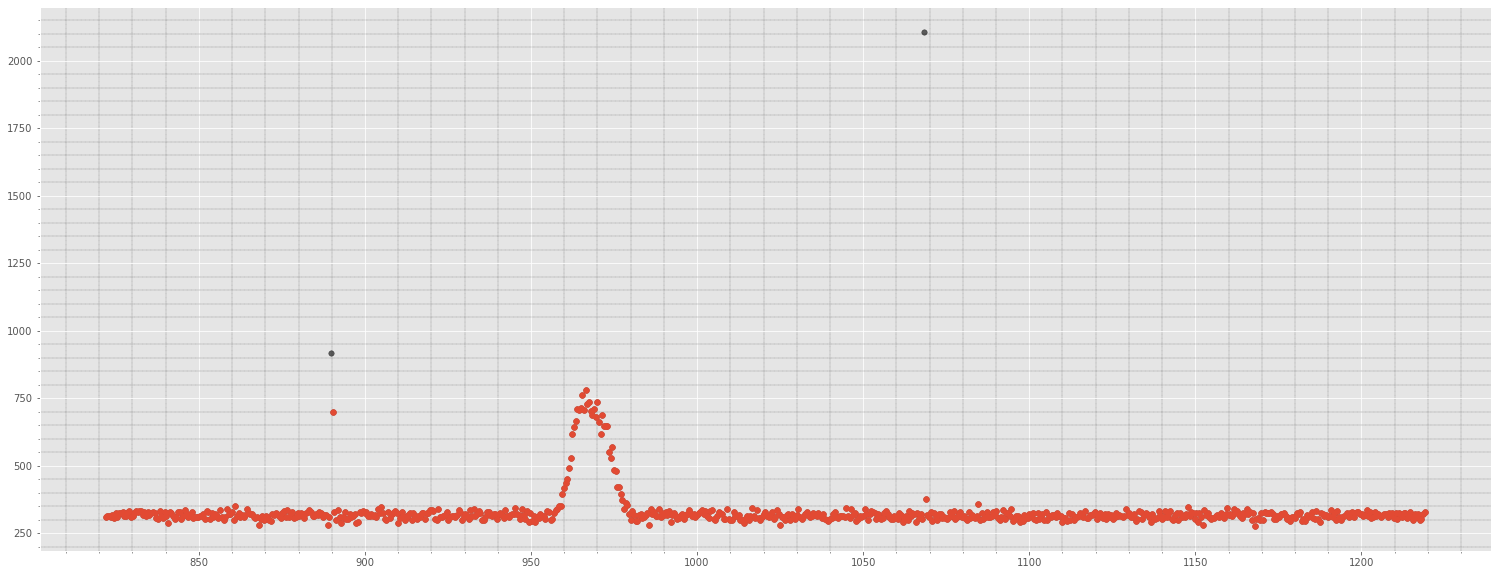

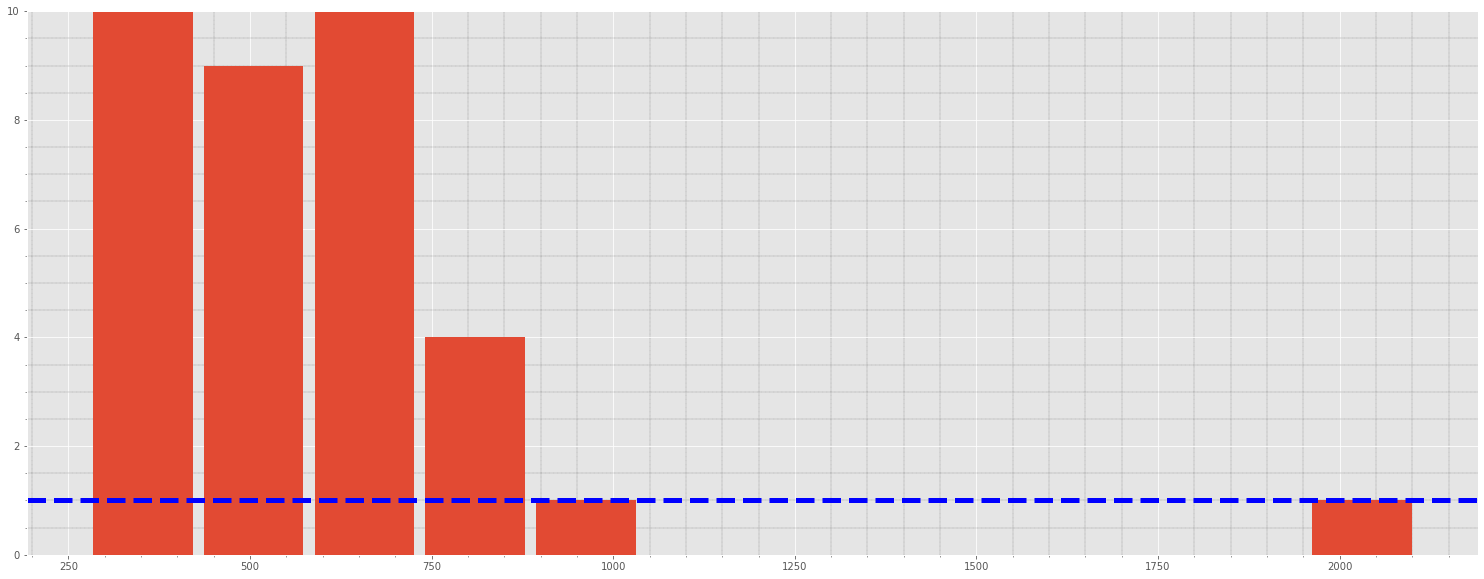

In [2]:
from analysis.tools import muon_filter
from analysis.tools import muon_filter_by_parts

# HISTOGRAM FILTER
bins = 12
wl = '320'

df = BaF_irrad['coll5']['BaF_B2_185_B'].df
y   = np.array(df.loc[(wl, '0', '15.0sec', 'bg_0')]['count'])[left:right]
x   = np.array(df.loc[(wl, '0', '15.0sec', 'bg_0')]['em_wl'])[left:right]

y_new = muon_filter(y, thresh = 1, bins = bins)

plt.scatter(x, y, alpha = alpha_single, color = 'black', s = 30)
plt.scatter(x, y_new);
plt.grid(visible=True, which='minor', color='black', linestyle='--', linewidth=0.25, alpha = 0.8) 
plt.minorticks_on()
plt.show();

plt.hist(y, bins = bins, rwidth=0.9)
plt.axhline(1, color = 'blue', linewidth = 5, linestyle = '--')
plt.ylim(0,10)
plt.grid(visible=True, which='minor', color='black', linestyle='--', linewidth=0.25, alpha = 0.75) 
plt.minorticks_on()

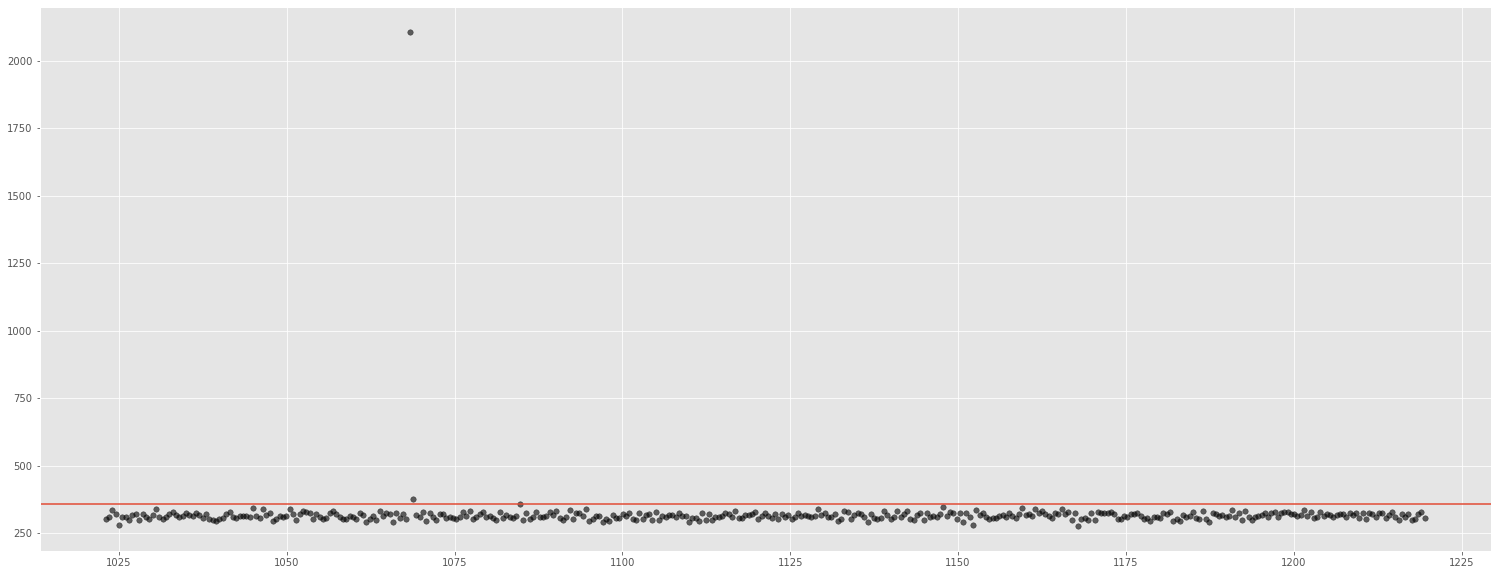

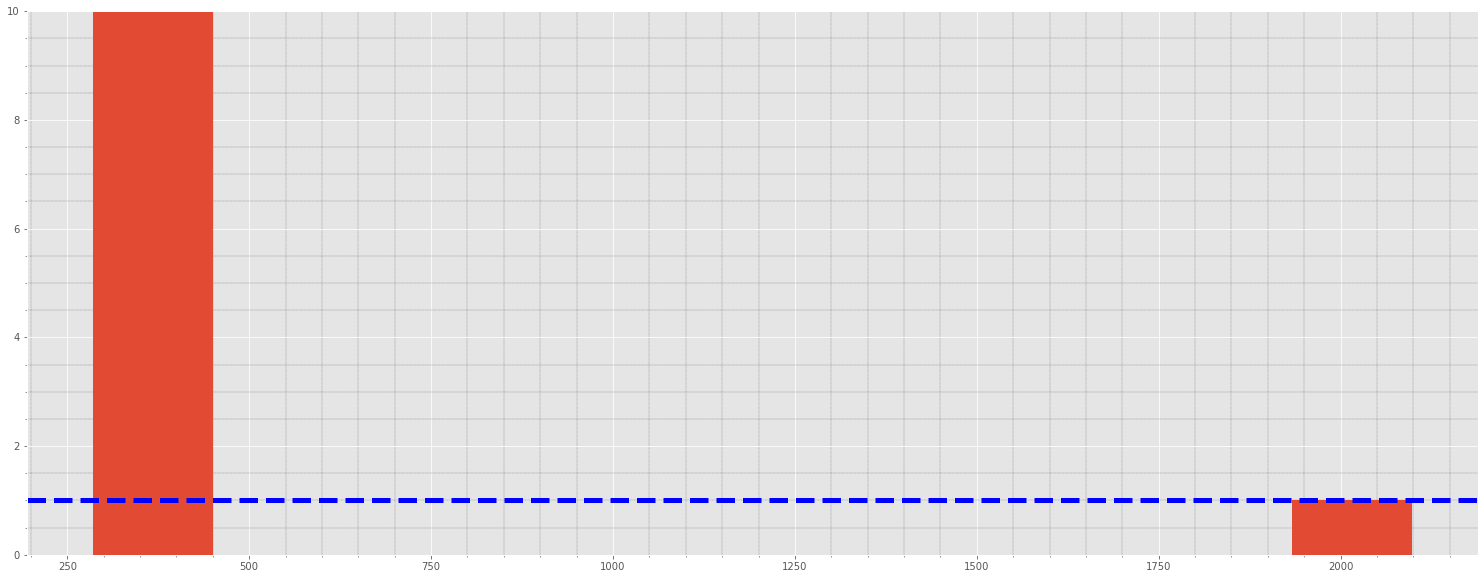

In [3]:
l = 400; r = 800; bins = 10
plt.scatter(x[l:r], y[l:r], alpha = alpha_single, color = 'black', s = 30)


hist = np.histogram(y[l:r], bins = bins)
ones_arr = []
for i in range(len(hist[0])):
    if hist[0][i] == 1:
        ones_arr.append(i)

plt.axhline(359.0)

plt.show()

plt.hist(y[l:r], bins = bins, rwidth=0.9)
plt.axhline(1, color = 'blue', linewidth = 5, linestyle = '--')
plt.ylim(0,10)
plt.grid(visible=True, which='minor', color='black', linestyle='--', linewidth=0.25, alpha = 0.75) 
plt.minorticks_on()

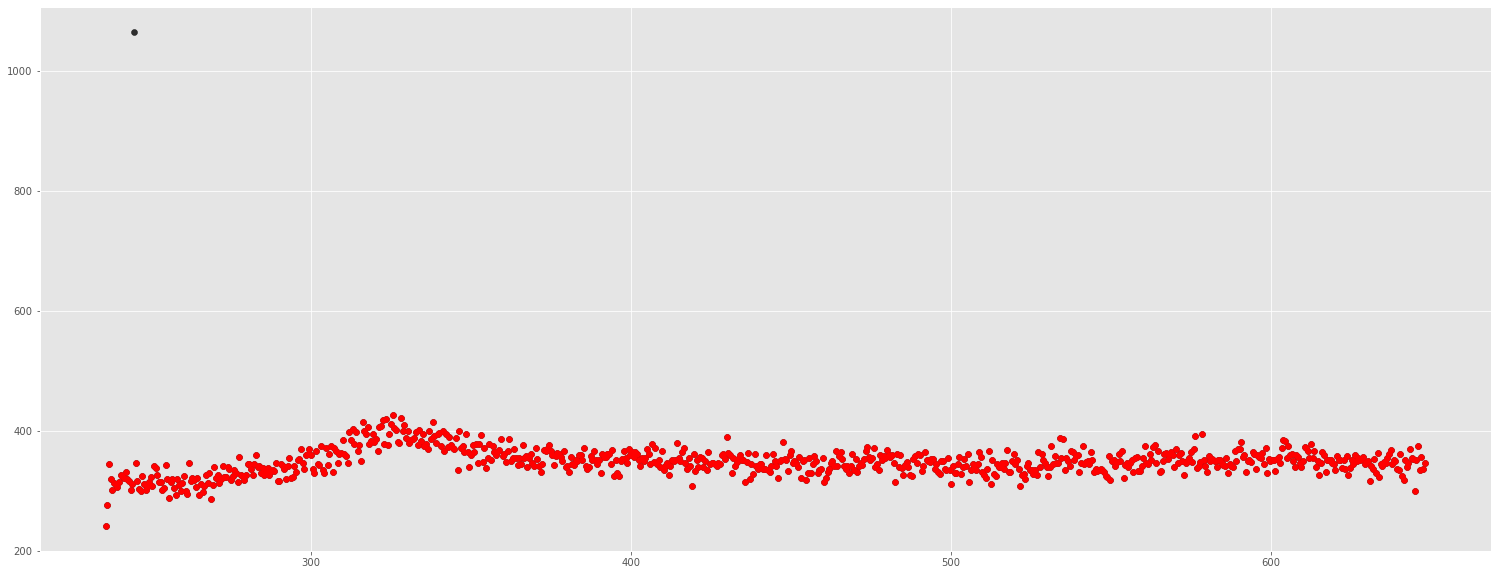

In [4]:
bins = 5
wl = '250'
th = 1

df = SP_irrad['coll6']['SP4500_A'].df
y   = np.array(df.loc[(wl, '0', '15.0sec', 'sp_0')]['count'])
x   = np.array(df.loc[(wl, '0', '15.0sec', 'sp_0')]['em_wl'])

y_a = y[0:200]
y_b = y[200:400]
y_c = y[400:600]
y_d = y[600:800]

y_a_F = muon_filter(y_a, thresh =th, bins = bins)
y_b_F = muon_filter(y_b, thresh = th, bins = bins)
y_c_F = muon_filter(y_c, thresh = th, bins = bins)
y_d_F = muon_filter(y_d, thresh = th, bins = bins)

Y =  np.concatenate((y_a_F, y_b_F, y_c_F, y_d_F))

plt.scatter(x,y, color = 'black', alpha = 0.8)
plt.scatter(x, Y, color = 'red')

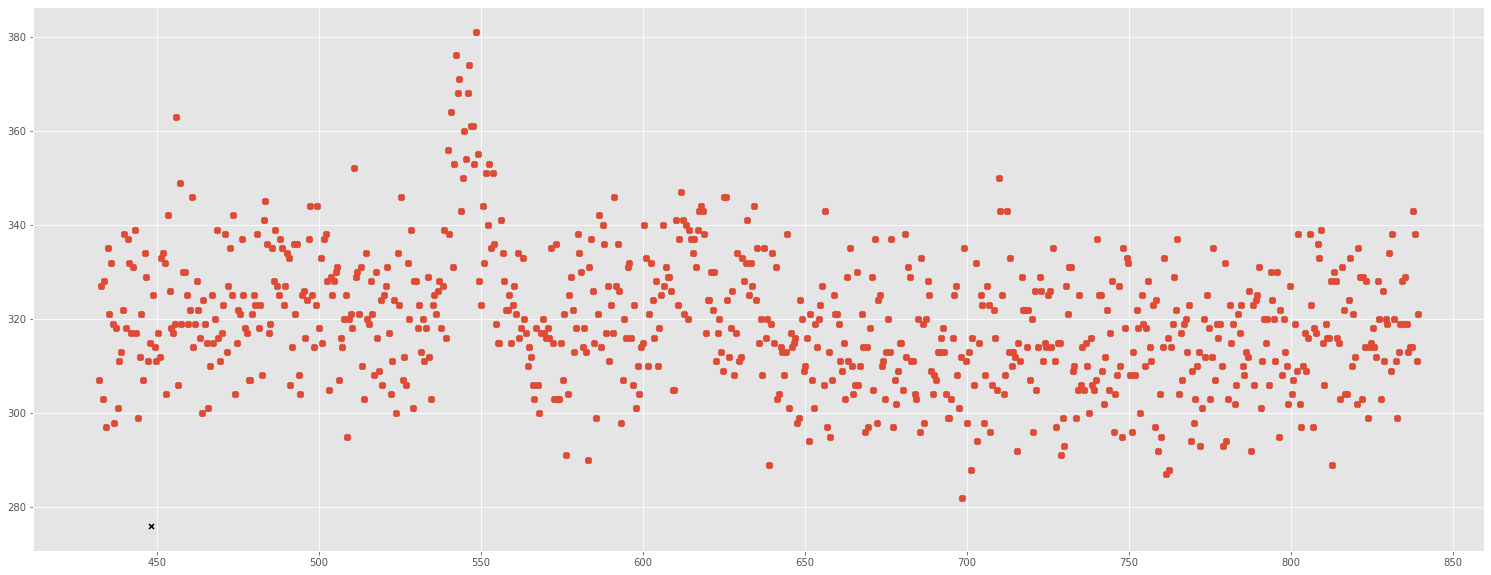

In [4]:
bins = 5
wl = '435'
th = 1
it = '0'
type = 'bg'

df = LiF_irrad['coll4']['LiF_B2_157_B'].df
y   = np.array(df.loc[(wl, '0', '15.0sec', f'{type}_{it}')]['count'])[left:right]
x   = np.array(df.loc[(wl, '0', '15.0sec', f'{type}_{it}')]['em_wl'])[left:right]

Y = muon_filter_by_parts(y, bins = bins, thresh = 1)

plt.scatter(x,y, color='black', s = 25, marker = 'x')
plt.scatter(x,Y, s=45)

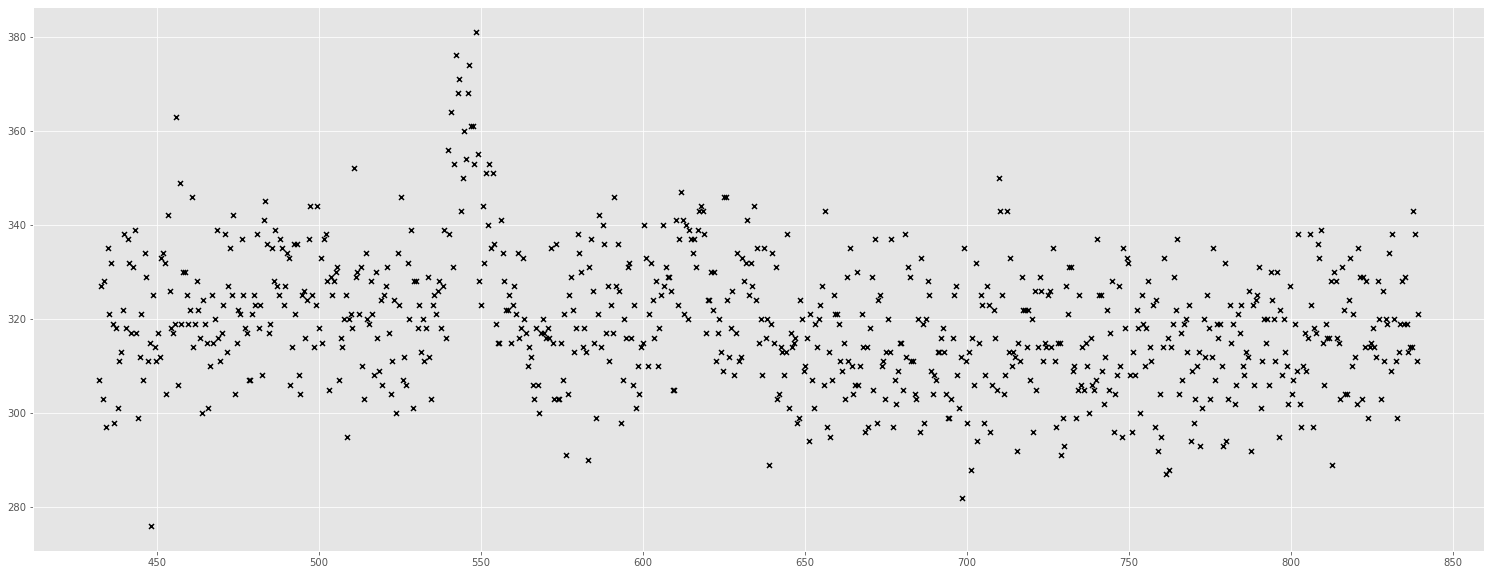

In [54]:
df = LiF_irrad['coll4']['LiF_B2_157_B'].df
y   = np.array(df.loc[(wl, '0', '15.0sec', f'{type}_{it}')]['count'])[1:799]
x   = np.array(df.loc[(wl, '0', '15.0sec', f'{type}_{it}')]['em_wl'])[1:799]

plt.scatter(x,y, color='black', s = 25, marker = 'x')
#plt.ylim(200,350)